<center><img src="http://what-when-how.com/wp-content/uploads/2012/07/tmp26dc139_thumb.png" width=50% > </center>

# <center> Assignment 2: Neighborhood Processing & Filters </center>
<center> Computer Vision 1 University of Amsterdam </center>
    <center> Due 23:59PM, September 23, 2023 (Amsterdam time) </center>

  ***
<center>
<b>TA's: Jiayi Shen, Valentinos Pariza</b>

Student1 ID: 15079015\
Student1 Name: Karim Abdel Sadek

Student2 ID: \
Student2 Name:

Student3 ID: \
Student3 Name:

( Student4 ID: \
Student4 Name: )


# General Guidelines

Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 1 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to use the Python environment provided with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the 'Environment Setup' below you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```python
conda env create --file=CV1_environment.yaml```, then activate the environment using the command ```python conda activate cv1```.
- Please express your thoughts concisely. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**

# O. Environment Setup

In [1]:
import math
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
import os 

import cv2
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.signal


In [2]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "3.4.2", "You're not using the provided Python environment!"
assert np.__version__ == "1.19.5", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.3.4", "You're not using the provided Python environment!"
assert sklearn.__version__ == "0.23.0", "You're not using the provided Python environment!"
# Proceed to the next cell only if you don't get any error.


# 1 Introduction


In this assignment, you will get familiar with fundamentals of neighborhood processing for image processing. These techniques allow for low-level image understanding via extraction of structural patterns such as edges and blobs. Similarly, they find an extensive use in image denoising and higher level image reasoning such as shape recognition. Moreover, neighborhood or block processing is one of the key components of *Convolutional Neural Networks*. Therefore, a good understanding of these
procedures will be a stepping stone towards understanding more complex machinery used in computer vision and machine learning.

In subsequent sections of this assignment, we will first explain neighborhood processing and introduce low-level filters commonly used to analyze images. After that, we will see how these mathematical concepts relate to practice by working through fundamental tasks such as denoising and segmentation. By the end of this assignment, you will have an overall understanding of the following:
* Gaussian and Gabor filters
* Edge detection and image denoising
* Texture-based image segmentation



# 2 Neighborhood Processing *(4 pts)*


Neighborhood processing is simply about looking around a point $I(x, y)$ (i.e. pixel) in the image, $I$, and applying a function, $h(k, l)$, which measures certain properties or relationships between the pixels in that localized window. The function, $h(k, l)$, is generally referred to as the neighborhood operator or local operator. One of the most common forms of a neighborhood operator is a linear filter. Linear filters simply compute the weighted sum of neighboring pixel intensities and assign it to the pixel of interest (output $I_{out}(i, j)$). The filters in which we are interested here are usually represented as a square matrix.

---
**Hint**: Filters, kernels, weight matrices or masks are interchangeably used in the literature. A kernel is a matrix with which we describe a neighborhood operation. This operation can, for example, be edge detection or smoothing.

---

Linear filters are shifted over the entire image plane via operators such as correlation ($\otimes$) and convolution ($\ast$). Both of these operators are *linear shift-invariant* (LSI) implying that the filters behave the same way over the entire image. Discrete forms of these operators are given in the following:


Correlation (1):
<center>
$\mathbf{I}_{out} = I \otimes  \mathbf{h}\\
 \mathbf{I}_{out}(i,j) = \sum_{k,l}  \mathbf{I}(i+k,j+l) \mathbf{h}(k,l)$
</center>
Convolution (2):
<center>
$    \mathbf{I}_{out} = \mathbf{I} \ast  \mathbf{h}\\
 \mathbf{I}_{out}(i,j) = \sum_{k,l} \mathbf{I}(i-k,j-l) \mathbf{h}(k,l)$
 </center>


---
The following example illustrates the overall idea of neighborhood processing. The kernel or the mask convolves over the input image. In the case of linear filters, this is simply multiplying each pixel intensity with the corresponding weight in the kernel (see the yellowish $7x7$ window where the kernel is placed). In the example, the kernel is $7x7$ averaging mask. You can see its effect by comparing the red (before filtering) and the green (after filtering) frames.





**Example:**
<div>
<img src="https://drive.google.com/uc?export=view&id=1HXt-WTi2Mg-jHYU4tvcKl4R29gi-g1QY" width="600"/>
</div>

### 2.1  Convolution and correlation operators (2 pts)
#### <span style="color:orange;"> Question 1 (2pts)  </span>

What is the difference between correlation and convolution operators? How do they treat the signals $\mathbf{I}$ and $\mathbf{h}$?

Convolutions first flips the signal h, after which it is applied to I. With correlation, H is not flipped.

### 2.2 Convolution and correlation operators (2 pts)
#### <span style="color:orange;"> Question 2 (2pts)  </span>
Correlation and convolution operators are equivalent when we make an assumption on the form of the mask $\mathbf{h}$. Can you identify the case? Give precise answer here.

If h is symmetrical in horizontal and vertical direction, which means that h stays the same if you flip it horizontal and vertical, the correlation and convolution operators give the same result.

# 3 Low-level filters *(25 pts)*


In this section, you will design common linear filters used in neighborhood processing. We will focus in particular on Gaussian and Gabor filters.

## 3.1 Gaussian Filters *(10 pts)*

### 3.1.1. 1D Gaussian Filter



The 1D  Gaussian filter is defined as follows:
<center>
$ G_{\sigma}(x)=\frac{1}{\sigma\sqrt{2\pi}}\text{ exp}(-\frac{x^2}{2\sigma^2}),$
</center>
where $\sigma$ is the variance of the Gaussian. However, such formulation creates an infinitely large convolution kernel. In practice, the kernel is truncated with a `kernel_size` parameter such that $-\left\lfloor \frac{kernel\_size}{2}\right\rfloor \leq x \leq \left\lfloor \frac{kernel\_size}{2} \right\rfloor$, where $\left\lfloor . \right\rfloor$ is the floor operator. As an example, if `kernel_size` equals 3, $x \in \{ -1, 0, 1 \} $.

Now, implement the following *gauss1D* function.

**Hint:**
Do not forget to normalize your filter.

**Note:** You are not allowed to use a Python built-in function provided by *SciPy* or other libraries to compute the kernel.

In [3]:
def gauss1D(sigma, kernel_size):
    '''
    Generates the 1D Gaussian kernel with given sigma and kernel size.
    :param sigma: variance of the Gaussian function
    :param kernel_size: size of the kernel
    :return: 1D Gaussian kernel
    '''
    G = np.zeros((1, kernel_size))
    if kernel_size % 2 == 0:
        raise ValueError('kernel_size must be odd, otherwise the filter will not have a center to convolve on')

    # TODO: YOUR CODE HERE
    kernel_start = int(-kernel_size/2)
    x = np.arange(kernel_start, kernel_start + kernel_size)
    G = np.exp(-(x**2)/(2*sigma**2))
    G = G / np.sum(G)

    return G

G = gauss1D(2, 5)
print(G)

[0.15246914 0.2218413  0.25137912 0.2218413  0.15246914]


In [4]:
# Run this to test your function:
assert np.all(np.round(gauss1D(2,5), 4) == [0.1525, 0.2218, 0.2514, 0.2218, 0.1525]) # check if values are close enough if assert gives error

### 3.1.2. 2D Gaussian Filter



One of the most important properties of 2D Gaussian kernels is separability. Therefore, convolving an image with a 2D Gaussian is equivalent to convolving
the image twice with a 1D Gaussian filter, once along the x-axis and once along the y-axis **separately**. A 2D Gaussian kernel can then be defined as a product of two 1D Gaussian kernels:
<center>
$
G_{\sigma}(x, y) = G_{\sigma}(x) \times G_{\sigma}(y)\;\;$ (Eq. A)
</center>
<center>
$
 = \frac{1}{\sigma^2 2\pi}\text{ exp}(-\frac{x^2 + y^2}{2\sigma^2})\;\;
 $ (Eq. B)
 </center>

#### <span style="color:#F64E25;">  Exercise 1 (3pt) </span>

Implement `gauss2D` function that corresponds to *Eq. A* (not *Eq. B*) and you should make use of `gauss1D`.

**Note:** Again, you are not allowed to use a Python built-in function provided by *SciPy* or other libraries to compute the kernel.

In [5]:
def gauss2D(sigma_x, sigma_y, kernel_size):
    '''
    Generates the 2D Gaussian kernel with given sigma_x for X dimension and sigma_y for Y dimension and kernel size.
    :param sigma_x: variance of the Gaussian function for dimension X
    :param sigma_y: variance of the Gaussian function for dimension Y
    :param kernel_size: size of the kernel
    :return: 2D Gaussian kernel
    '''

    # TODO: YOUR CODE HERE
    kernel_x = gauss1D(sigma_x, kernel_size)
    kernel_y = gauss1D(sigma_y, kernel_size)
    G = np.zeros((kernel_size, kernel_size))
    G = [kernel_x[i] * kernel_y for i in range(kernel_size)]
    return G

print(gauss2D(2, 2, 3))

[array([0.10186806, 0.11543164, 0.10186806]), array([0.11543164, 0.13080118, 0.11543164]), array([0.10186806, 0.11543164, 0.10186806])]


In [6]:
# Run this to test your function:
assert np.all( np.round(gauss2D(2, 2, 3) , 4) == [[0.1019, 0.1154, 0.1019],
       [0.1154, 0.1308, 0.1154],
       [0.1019, 0.1154, 0.1019]])

Now consider the following two scenarios.
1. In first the image is convolved with a 2D Gaussian kernel.
2. In second image is convolved a 1D Gaussian kernel in the x- and y-direction.


#### <span style="color:orange;">  Question 3 (1 pt) </span>
Will the result be the same in (1) and (2)? Answer Yes/No. Why?

Yes, the results will be the same. This is because the convolution operator is associative. This means that f * (g * h) = (f * g) * h, where * denotes the convolution operator. In the first case, f * (g * h) is done, where f is the image and g and h are the 1d kernels, since the 2d kernel is separatable in the 2 1d kernels. In the second case, (f * g) * h is done, where the image f is first convolved with a kernel g, either the x- or y-derivative, and that result is convolved by a kernel h, the other derivative.

#### <span style="color:orange;"> Question 4 (2pts)  </span>
What is the computational complexity for both cases? Give an answer in big *O* notation, *n* for width of image, *m* for height of image and *k* for size of kernel.

In the first case, the computational complexity is O($nmk^2$). In the second case, the computational complexity is O($2nmk$)=O($nmk$), which is much better than the computational complexity in the first case.

### 3.1.3. Gaussian Derivatives
So far the Gaussian kernels that we computed are mainly targeted to image enhancement algorithms (e.g. denoising an image). These kernels can also be used for detecting changes in the image intensity pixels. These low-level features can then further be used as building blocks for more complicated tasks like object detection or segmentation.


Concretely, the  first order derivative of the 1D Gaussian kernel is given by:

<center>
$
\frac{d}{dx}G_\sigma(x)  =\frac{d}{dx}\left( \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{x^2}{2\sigma^2}) \right )
$
</center>

<center>
$
 = -\frac{x}{\sigma^3\sqrt{2\pi}}\exp(-\frac{x^2}{2\sigma^2}) \;\;
$ (Eq. C)
</center>

<center>
$
= -\frac{x}{\sigma^2}G_\sigma(x)
$
</center>
Similarly, the first order derivative of the 2D Gaussian kernel can be obtained by computing $\frac{d}{dx}G_\sigma(x,y)$ and $\frac{d}{dy}G_\sigma(x,y)$.

#### <span style="color:orange;"> Question 5 (1pt) </span>
Determine the first order derivative of the 2D Gaussian kernel by computing $\frac{d}{dx}G_\sigma(x,y)$ and $\frac{d}{dy}G_\sigma(x,y)$. Show your calculations, as done above for $\frac{d}{dx}G_\sigma(x)$. Remember that:

<center>
$
G_{\sigma}(x, y) =\frac{1}{\sigma^2 2\pi}\text{ exp}(-\frac{x^2 + y^2}{2\sigma^2})
 $
 </center>

<center>
$
\frac{d}{dx}G_\sigma(x, y)  =\frac{d}{dx}\left( \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{x^2 + y^2}{2\sigma^2}) \right )
$
</center>

<center>
$
 = -\frac{x}{\sigma^3\sqrt{2\pi}}\exp(-\frac{x^2 + y^2}{2\sigma^2}) \;\;
$ 
</center>

<center>
$
= -\frac{x}{\sigma^2}G_\sigma(x, y)
$
</center>
<br/><br/>

<center>
$
\frac{d}{dy}G_\sigma(x, y)  =\frac{d}{dy}\left( \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{x^2 + y^2}{2\sigma^2}) \right )
$
</center>

<center>
$
 = -\frac{y}{\sigma^3\sqrt{2\pi}}\exp(-\frac{x^2 + y^2}{2\sigma^2}) \;\;
$ 
</center>

<center>
$
= -\frac{y}{\sigma^2}G_\sigma(x, y)
$
</center>

<br/><br/>

<center>
$
\nabla G_\sigma(x, y) = \frac{d}{dx}G_\sigma(x, y) \times \frac{d}{dy}G_\sigma(x, y)
$
</center>

<center>
$
= -\frac{x}{\sigma^2}G_\sigma(x, y) \times -\frac{y}{\sigma^2}G_\sigma(x, y)
$
</center>

<center>
$
= -\frac{xy}{\sigma^2}G_\sigma(x, y)
$
</center>

#### <span style="color:orange;"> Question 6 (3pts) </span>
A second order derivative of the Gaussian kernel can also be computed.
Why is it interesting to design a second order kernel? Give one example of where it is more beneficial to use them than first order derivative Gaussian kernel and explain how they can be used.

Where the first order derivative captures changes in pixels as local maxima and minima, the second order derivative represents these as zero-crossings. Zero-crossings are easier to compute than local maxima and minima, and therefore, when one is interested in the local maxima and minima, it might be interesting to use the second order derivative. This is for example the case in edge detection. Here, one is interested in places where there is a large change in pixels, e.g. the pixels go from light to dark fast. So, one would want to compute the local maxima and minima, but since it is easier to do this with the second derivative zero-crossings, it is beneficial to use the second order kernels instead.

## 3.2 Gabor filters *(15 pts)*


Gabor filters fall into the category of linear filters and are widely used for *texture analysis*. The reason why they are a good choice for texture analysis is that they localize well in the frequency spectrum (*optimally* bandlimited) and therefore work as flexible *band-pass* filters.

In the following image you can see even (cosine-modulated) and odd parts (sine-modulated) of Gabor filters with fixed-σ Gaussian. You can observe time-domain filters for the modulating sinusoidals of central frequencies, 10, 20, 30, 40 and 50 Hz, respectively.


<div>
<img src="https://drive.google.com/uc?export=view&id=1wv6ZUOfiHMDgg0jW7n5lqkaFiFztjnEo" width="700"/>
</div>

Gabor filters with varying center frequencies are sensitive to different
frequency bands. Notice that the neighboring (in the frequency spectrum) filters minimally interfere with each other.


<div>
<img src="https://drive.google.com/uc?export=view&id=1hUQaKE_TwC-9_jMIao1CCxyjembMrUab" width="700"/>
</div>

### 3.2.1. 1D Gabor Filters

For the sake of simplicity, we start by studying what a Gabor function is using 1D signals (e.g. speech). The idea will later be generalized to the 2D case, which is suited for our primary interest, images. A Gabor function is a Gaussian function modulated with a complex sinusoidal carrier signal. Let us denote the Gaussian with $x(t)$ and complex sinusoidal with $m(t)$. Then, a Gabor function $g(t)$ can be formulated by:

$
g(t) = x(t) m(t)   
$ *(Eq. D)*

where $x(t) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{t^2}{2\sigma^2}}$ and $m(t)=e^{j 2 \pi f_c t} = e^{j w_c t}$. $\sigma$ is the parameter determining the spread of the Gaussian and $w_c$ is the central frequency of the carrier signal.


---


**Hint:**
A complex sinusoidal can be represented as follows using the *Euler's formula*:
$e^{jwt} = \cos(wt) + j\sin(wt)$


---



Using Euler's formula, we get the following:
\begin{align}
    g(t) &= x(t)m(t) \\
    g(t) &= \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{t^2}{2\sigma^2}} e^{j w_c t} \\
    g(t) &= \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{t^2}{2\sigma^2}} [\cos(w_c t) + j\sin(w_c t)]
\end{align}
We can further arrange the terms and arrive at the following form
\begin{align}
    g(t) = g_e(t) + jg_o(t)
\end{align}
where $g_e(t)$ and $g_o(t)$ are the even and odd parts arranged orthogonally on the complex plane $\mathbf{Z}^2$. In practice, one can use either the even or the odd part for filtering purposes (or one can use the complex form).  

### 3.2.2. 2D Gabor Filters


The Gabor filters can also be defined in 2D as well. The main difference lies in the dimensionality of the signals (i.e. carrier and gaussian). A sine wave in 2D is described by two orthogonal spatial frequencies $u_0$ and $v_0$ such that it is given as $s(x,y) = sin(2\pi(u_0 x + v_0 y))$ where a 2D gaussian is simply $C e^{-(\frac{(x-x_0)^2}{2\sigma_x^2}) + \frac{(y-y_0)^2}{2\sigma_y^2})}$ with $C$ being a normalizing constant. 2D Gabor function then takes the following forms in the real and complex parts:

\begin{align}
    g_{real}(x,y; \lambda, \theta, \psi, \sigma, \gamma) = \exp\left(-\frac{x^{\prime2}+\gamma^2 y^{\prime2}}{2\sigma^2}\right)
\cos\left( 2\pi \frac{x^{\prime}}{\lambda} + \psi  \right),                                              
\end{align}
\begin{align}
g_{im}(x,y; \lambda, \theta, \psi, \sigma, \gamma) &= \exp\left(-\frac{x^{\prime2}+\gamma^2 y^{\prime2}}{2\sigma^2}\right)
\sin\left( 2\pi \frac{x^{\prime}}{\lambda} + \psi  \right),
\end{align}

where
\begin{align}
    x^\prime &= x\cos\theta + y\sin\theta, \\
    y^\prime &= -x\sin\theta + y\cos\theta.
\end{align}

$\lambda, \theta, \psi, \sigma, \gamma$ are parameters to control the shape and size of the Gabor functionin. We set their values to create different Gabor kernels.

#### <span style="color:#F64E25;"> Exercise 2 (10pts) </span>

##### Design array of Gabor Filters

In section 4 of this notebook, you will create a Gabor Filterbank. A filterbank is a collection of filters with varying properties (e.g. {shape, texture}). A Gabor filterbank consists of Gabor filters of distinct orientations and scales. We will use this bank to extract texture information from the input image.

Now, your task is to implement function `createGabor()` but to do that you will need some helper functions, which are defined below. Finish the implementation of those and then use them in `createGabor()`.





In [7]:
def generateRotationMatrix(theta):
    '''
    Returns the rotation matrix for a given theta.
    Hint: https://en.wikipedia.org/wiki/Rotation_matrix
    :param theta: rotation parameter in radians
    :return: rotation matrix
    '''

    # TODO: YOUR CODE HERE
    # Code the rotation matrix which fits gabor equation given theta.
    rotMat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return rotMat.T


In [8]:
def createCos(rot_x, lamda, psi):
    '''
    Returns the 2D cosine carrier.
    '''
    # TODO: YOUR CODE HERE
    # Implement the cosine given rot_x, lamda and psi.
    rot_x = np.reshape(rot_x, (-1, int(np.sqrt(rot_x.shape[0]))))
    cosCarrier = np.cos(2*math.pi * (rot_x/lamda) + psi)
    return cosCarrier

In [9]:
def createSin(rot_x, lamda, psi):
    '''
    Returns the 2D sine carrier.
    '''

    # TODO: YOUR CODE HERE
    # Implement the sine given rot_x, lamda and psi.
    rot_x = np.reshape(rot_x, (-1, int(np.sqrt(rot_x.shape[0]))))
    sinCarrier = np.sin(2*math.pi * (rot_x/lamda) + psi)
    return sinCarrier

In [10]:
def createGauss(rot_x, rot_y, gamma, sigma):
    '''
    Returns the 2D Gaussian Envelope.
    Hint: ensure that gaussEnv has same dimensions as sinCarrier and cosCarrier by reshaping it in same manner
    '''

    # TODO: YOUR CODE HERE
    # Implement the Gaussian envelope.
    rot_x = np.reshape(rot_x, (-1, int(np.sqrt(rot_x.shape[0]))))
    rot_y = np.reshape(rot_y, (-1, int(np.sqrt(rot_y.shape[0]))))
    gaussEnv = np.exp(-(rot_x**2 +gamma**2 * rot_y**2)/(2*sigma**2))
    return gaussEnv

Implement the function `createGabor` using above helper functions and equations for $g_{real} $ and $g_{im}$.


In [11]:
def createGabor(sigma, theta, lamda, psi, gamma):
    '''
    Creates a complex valued Gabor filter. Use it like this:
    myGabor = createGabor(sigma, theta, lamda, psi, gamma) generates Gabor kernels.

    :param sigma: Standard deviation of Gaussian envelope.
    :param theta: Orientation of the Gaussian envelope. Takes arguments in the range [0, pi/2).
    :param lamda: The wavelength for the carriers. The central frequency (w_c) of the carrier signals.
    :param psi: Phase offset for the carrier signal, sin(w_c . t + psi).
    :param gamma: Controls the aspect ratio of the Gaussian envelope
    :return: myGabor - A matrix of size [h,w,2], holding the real and imaginary
                        parts of the Gabor in myGabor(:,:,1) and myGabor(:,:,2), respectively.
    '''

    
    # Set the aspect ratio.
    sigma_x = sigma
    sigma_y = float(sigma)/gamma

    # Generate a grid
    nstds = 3
    xmax = max(abs(nstds*sigma_x*np.cos(theta)),abs(nstds*sigma_y*np.sin(theta)))
    xmax = np.ceil(max(1,xmax))
    ymax = max(abs(nstds*sigma_x*np.sin(theta)),abs(nstds*sigma_y*np.cos(theta)))
    ymax = np.ceil(max(1,ymax))

    # Make sure that we get square filters.
    xmax = max(xmax,ymax)
    ymax = max(xmax,ymax)
    xmin = -xmax
    ymin = -ymax
    # Generate a coordinate system in the range [xmin,xmax] and [ymin, ymax].
    [x,y] = np.meshgrid(np.arange(xmin, xmax+1), np.arange(ymin, ymax+1))

    # Convert to a 2-by-N matrix where N is the number of pixels in the kernel.
    XY = np.concatenate((x.reshape(1, -1), y.reshape(1, -1)), axis=0)

    # Compute the rotation of pixels by theta.
    # Hint: Create appropriate rotation matrix to compute the rotated pixel coordinates: rot(theta) * XY.
    rotMat = generateRotationMatrix(theta)
    rot_XY = np.matmul(rotMat, XY)
    rot_x = rot_XY[0,:]
    rot_y = rot_XY[1,:]

    # Create the Gaussian envelope.
    # IMPLEMENT the helper function createGauss above.
    gaussianEnv = createGauss(rot_x, rot_y, gamma, sigma)

    # Create the orthogonal carrier signals.
    # IMPLEMENT the helper functions createCos and createSin above.
    cosCarrier = createCos(rot_x, lamda, psi)
    sinCarrier = createSin(rot_x, lamda, psi)

    # Modulate (multiply) Gaussian envelope with the carriers to compute
    # the real and imaginary components of the complex Gabor filter.
    myGabor_real = gaussianEnv*cosCarrier#np.outer(gaussianEnv, cosCarrier)  # TODO: modulate gaussianEnv with cosCarrier
    myGabor_imaginary = gaussianEnv*sinCarrier #np.outer(gaussianEnv, sinCarrier)  # TODO: modulate gaussianEnv with sinCarrier

    # Pack myGabor_real and myGabor_imaginary into myGabor.
    h, w = myGabor_real.shape
    myGabor = np.zeros((h, w, 2))
    myGabor[:,:,0] = myGabor_real
    myGabor[:,:,1] = myGabor_imaginary

    # Uncomment below to see how are the gabor filters
    # fig = plt.figure()
    # ax = fig.add_subplot(1, 2, 1)
    # ax.imshow(myGabor_real)    # Real
    # ax.axis("off")
    # ax = fig.add_subplot(1, 2, 2)
    # ax.imshow(myGabor_imaginary)    # Real
    # ax.axis("off")

    return myGabor

sigma = 2
theta = 0.3
lamda = 1000
psi = 0
gamma = 1
myGabor = createGabor(sigma, theta, lamda, psi, gamma)

Visualize how the parameters $\theta$, $\sigma$ and $\gamma$ affect the filter in spatial domain. In this task you should also make sure that it is clear to the reader of what each image represents, so making an actual visualisation is the task of this exercise.

**Hints**:
1. The initialization of these parameter are provided: $\lambda=30, \theta=0, \psi=0, \sigma=10, \gamma=0.25$.
2. Set $\theta$ as $ 0, \pi/4,$ or $\pi/2$, and keep other parameters unchanged.
3. Set $\sigma$ as $0.25, 0.50,$ or $0.75$, and keep other parameters unchanged.
4. Set $\gamma$ as $10, 30,$ or $45$, and keep other parameters unchanged.

In [12]:
# HELPER FUNCTIONS (if needed)
def plot_gabors(myGabor, title):
    myGabor_real = myGabor[:,:,0]
    myGabor_imaginary = myGabor[:,:,1]
    
    fig = plt.figure()
    plt.suptitle(title)
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(myGabor_real)    # Real
    ax.set_title("Real")
    ax.axis("off")
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(myGabor_imaginary)    # Imaginary
    ax.set_title("Imaginary")
    ax.axis("off")

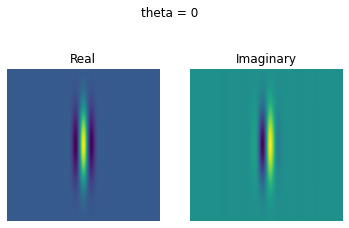

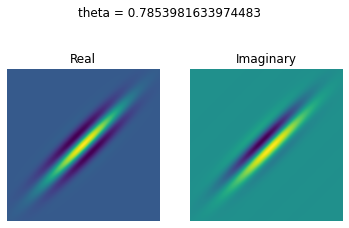

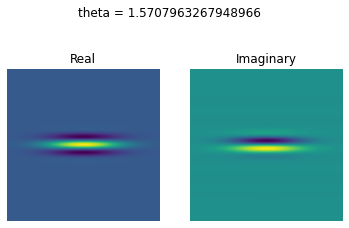

In [13]:
# YOUR CODE HERE FOR THETA
sigma = 10
theta = 0
lamda = 30
psi = 0
gamma = 0.25
thetas = [0, math.pi*0.25, math.pi*0.5]
for theta in thetas:
    myGabor = createGabor(sigma, theta, lamda, psi, gamma)
    plot_gabors(myGabor, f"theta = {theta}")

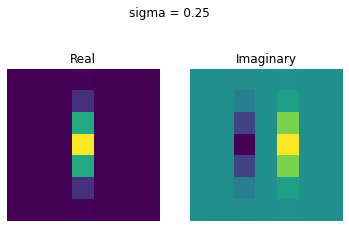

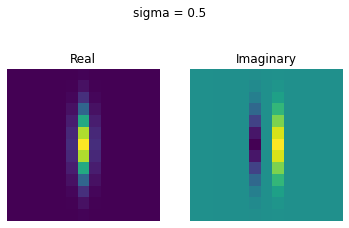

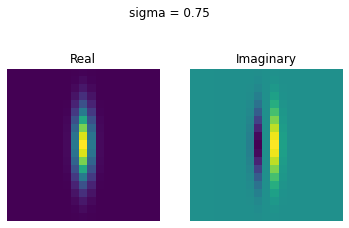

In [14]:
# YOUR CODE HERE FOR SIGMA
sigma = 10
theta = 0
lamda = 30
psi = 0
gamma = 0.25
sigmas = [0.25, 0.5, 0.75]
for sigma in sigmas:
    myGabor = createGabor(sigma, theta, lamda, psi, gamma)
    plot_gabors(myGabor, f"sigma = {sigma}")

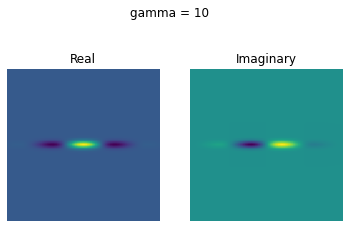

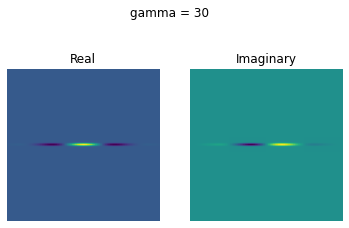

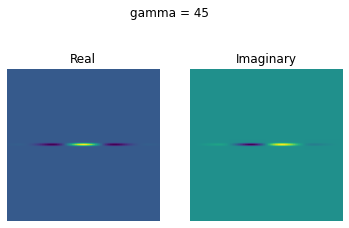

In [15]:
# YOUR CODE HERE FOR SIGMA
sigma = 10
theta = 0
lamda = 30
psi = 0
gamma = 0.25
gammas = [10, 30, 45]
for gamma in gammas:
    myGabor = createGabor(sigma, theta, lamda, psi, gamma)
    plot_gabors(myGabor, f"gamma = {gamma}")

#### <span style="color:orange;"> Question 7 (5pts) </span>
Based on the visualizations of parameters and your self-study on the Gabor filters, explain shortly (1) what the parameters $\lambda, \theta, \psi, \sigma, \gamma$ control and (2) how do they influence the Gabor filter kernel visualy.

$\lambda$ represents the wavelength of interest. This means that the lambda in the filter is the wavelength for which is "searched" in the image. Visually, $\lambda$ represents the thickness of the colored lines. If $\lambda$ is smaller, the lines are thinner, whereas if $\lambda$ is larger, the lines are thicker.

$\theta$ controls the orientation of the lines in the gabor filter. Visually, if $\theta$ is 0, the lines are vertical, and if $\theta$ is $0.5\pi$, the lines are horizontal. 

$\psi$ represents the phase offset of the sinusoidal. Visually, $\psi$ changes the color of the image.

$\sigma$ is the standard deviation of the gaussian part of the filter, the gaussian envelope. In the images, the larger the $\sigma$ is, the smoother/blurrier the lines are.

$\gamma$ specifies to what extent the shape of the image that is filtered an ellipse is. If $\gamma$ is smaller than 1, the ellipse has a vertical shape, where the smaller the $\gamma$, the more vertical the ellipse is. If $\gamma$ is 1, the ellipse is a perfect circle. If $\gamma$ is larger than 1, the ellipse takes a horizontal shape, where if $\gamma$ gets larger, the ellipse shape approaches a horizontal line form.

# 4 Applications in image processing *(71 pts)*

## 4.1 Noise in digital images

The quality of digital images can be affected in different ways. For example, the
acquisition process can be very noisy and with a low-resolution (e.g. some medical
imaging modalities only generate a 128x128 image). Noise can also come from the
user who set wrong parameters on the digital camera. Consequently, different computer vision algorithms are required to enhance noisy or corrupted images. With the
growing amount of photos taken every day, image enhancement has then become a
very active area of research.

In this section, we only focus on simple algorithms to correct noise coming typically from the sensor of your camera. Many other types of noise or corruption can happen but are out of the scope of this assignment.

### 4.1.1. Salt-and-pepper noise

Noise can also occur with over-exposition causing a ”hot” pixel or with a defective
sensor causing a ”dead” pixel. This is called salt-and-pepper noise. Pixels in the
image are randomly replaced by either a white or black pixel.

### 4.1.2 Additive Gaussian noise

Noise also occurs frequently when the camera heats up. This is called thermal noise
and this can be modeled as an additive Gaussian noise. Every pixel in the image
has a noise component that corresponds to a random value chosen independently
from the same Gaussian probability distribution. The Gaussian distribution has a
mean of 0 and its standard deviation corresponds to a parameter.

\begin{equation}
\begin{array}{rl}
\mathbf{I}^{\prime}(x) = \mathbf{I}(x) + \epsilon \text{, where } \epsilon \sim  \mathcal{N}(0, \sigma^2)
\end{array}
\end{equation}

where $\mathbf{I}^{\prime}$ is the noisy image and $\mathbf{I}$ is the original image without any noise $\epsilon$.

## 4.2 Image denoising (26 pts)

### 4.2.1 Quantitative evaluation *(9 pts)*

The peak signal-to-noise ratio (PSNR) is a commonly used metric to quantitatively evaluate the performance of image enhancement algorithms. It is derived from the mean squared error (MSE):

\begin{equation}
\begin{array}{rl}
MSE = \frac{1}{m \cdot n}\sum\limits_{x,y}\Big[\mathbf{I}(x,y) - \mathbf{\hat{I}}(x,y)\Big]^2
\end{array}
\end{equation}
where $\mathbf{I}$ is the original image of size $m\times n$ and $\mathbf{\hat{I}}$ its approximation (i.e. in our case an enhanced corrupted image). The PSNR corresponds to:

\begin{equation}
\begin{split}
PSNR & = 10 \cdot \log_{10} \Big(\frac{\mathbf{I}_{max}^2}{MSE}\Big) \\
 & = 20 \cdot \log_{10} \Big(\frac{\mathbf{I}_{max}}{\sqrt{MSE}}\Big) \\
 & = 20 \cdot \log_{10} \Big(\frac{\mathbf{I}_{max}}{RMSE}\Big)
\end{split}
\end{equation}
where $\mathbf{I}_{max}$ is the maximum pixel value of $\mathbf{I}$ and RMSE is the root of the MSE.

Note: $\mathbf{I}_{max}$ is the maximum possible pixel value, so in case of uint8: $\mathbf{I}_{max}=255$



#### <span style="color:orange;"> Question 8 (1 pt) </span>
When comparing different methods with the PSNR metric, is a higher value the better or the opposite? Explain your answer shortly.

If the MSE gets bigger, the number in the log gets bigger, since the numerator is always bigger than the denumerator. This means that, if the MSE gets bigger, the PSNR will also get bigger, so a higher PSNR is better.

#### <span style="color:#F64E25;">Exercise 3 </span>

Implement `myPSNR`.

**Note 1:** Define this function so that it works for grayscale *and* RGB images. However, note that the formula differs for the RGB representation, so think carefully of which part(s) of the formula need to be changed.


**Note 2:** You are not allowed to use the Python built-in functions provided in *PIL* and *Skimage*.

In [40]:
def myPSNR(orig_image, approx_image):
    '''
    Should return the PSNR value for 2 input images.
    Note: this can be used for both RGB *and* Black and White images.
    However, depending on the case your formula would differ a bit.
    '''
    
    # TODO: YOUR CODE HERE
    orig_image = orig_image.astype('float32')
    approx_image = approx_image.astype('float32')
    if len(orig_image.shape) == 3:
        m, n = orig_image.shape[:2]
        MSE_b = 1/(m*n) * np.sum((orig_image[:, :, 0] - approx_image[:, :, 0])**2)
        MSE_g = 1/(m*n) * np.sum((orig_image[:, :, 1] - approx_image[:, :, 1])**2)
        MSE_r = 1/(m*n) * np.sum((orig_image[:, :, 2] - approx_image[:, :, 2])**2)
        MSE = (MSE_b + MSE_g + MSE_r) / 3
        PSNR = 20 * np.log10(255/np.sqrt(MSE))
    else:
        m, n = orig_image.shape
        MSE = 1/(m*n) * np.sum((orig_image - approx_image)**2)
        PSNR = 20 * np.log10(255/np.sqrt(MSE))
    return PSNR

#### <span style="color:#F64E25;">Exercise 4 </span>
Using your implemented function **myPSNR**, compute the PSNR between image1_saltpepper.jpg and image1.jpg.

  **Hint:**
Make sure that dtype of image is float32.

In [42]:
# TODO: YOUR CODE HERE
approx_image_color = cv2.imread("./sample_data/image1_saltpepper.jpg").astype(np.float32)
orig_image_color = cv2.imread("./sample_data/image1.jpg").astype(np.float32)

approx_image = cv2.cvtColor(approx_image_color, cv2.COLOR_BGR2GRAY)
orig_image = cv2.cvtColor(orig_image_color, cv2.COLOR_BGR2GRAY)
PSNR = myPSNR(orig_image, approx_image)
print(PSNR)

15.532208785227796


 #### <span style="color:orange;"> Question 9 (4 pts) </span>
 What PSNR value did you get?

15.532208785227796

#### <span style="color:#F64E25;"> Exercise 5 </span>
Using your implemented function **myPSNR**, compute the PSNR between image1_gaussian.jpg and image1.jpg.

In [18]:
# TODO: YOUR CODE HERE
approx_image_color = cv2.imread("./sample_data/image1_gaussian.jpg").astype(np.float32)
orig_image_color = cv2.imread("./sample_data/image1.jpg").astype(np.float32)

approx_image = cv2.cvtColor(approx_image_color, cv2.COLOR_BGR2GRAY)
orig_image = cv2.cvtColor(orig_image_color, cv2.COLOR_BGR2GRAY)
PSNR = myPSNR(orig_image, approx_image)
print(PSNR)

17.170831127299063


#### <span style="color:orange;"> Question 10 (4 pts) </span>
What PSNR value did you get?

17.170831127299063

### 4.2.2 Neighborhood processing for image denoising *(17 pts)*

We will now design filters to remove these two types of noise. The function will denoise the image by either applying:

1. *box filtering*: You can use **cv2.blur** function.
2. *median filtering*: You can use **cv2.medianBlur** function.
3. *Gaussian filtering*: You must use your **cv2.GaussianBlur** function.

#### <span style="color:#F64E25;">Exercise 6 </span>

Implement `denoise`

**Hints:**
1. **kernel_type** is just a string to specify the kernel type.
2. ****kwargs** allows to have an undefined key-value pairs in a Python function. For example, you can have **sigma** and  **kernel_size** as argument when using a Gaussian kernel but only **kernel_size** when using a box kernel. For more information about how ****kwargs** works, take a look at [usage of kwargs](https://book.pythontips.com/en/latest/args_and_kwargs.html#usage-of-kwargs).

In [19]:
def denoise(image, kernel_type, **kwargs):
    '''
    Function denoises the image with the kernel_type method:
    - 'box': by using box filter
    - 'median': by using median filter
    - 'gaussian': by using gaussian filter
    :return: imOut - denoised image
    '''
    if kernel_type == 'box':
        # TODO: YOUR CODE HERE
        imOut = cv2.blur(image, kwargs["kernel_size"])

    elif kernel_type == 'median':
        # TODO: YOUR CODE HERE
        imOut = cv2.medianBlur(image, kwargs["kernel_size"])

    elif kernel_type == 'gaussian':
        # TODO: YOUR CODE HERE
        imOut = cv2.GaussianBlur(image, kwargs["kernel_size"], kwargs["sigma"])

    else:
        print('Operation Not implemented')

    return imOut

#### <span style="color:orange;"> Question 11 (6 pts) </span>
Using your implemented function **denoise**, try denoising image1_saltpepper.jpg and image1_gaussian.jpg by applying the following filters:

**(a)** Box filtering with size: 3x3, 5x5, and 7x7.

**(b)** Median filtering with size: 3x3, 5x5 and 7x7.

Show the denoised images in the cell below.


/Users/machameijer/anaconda3/envs/cv1/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


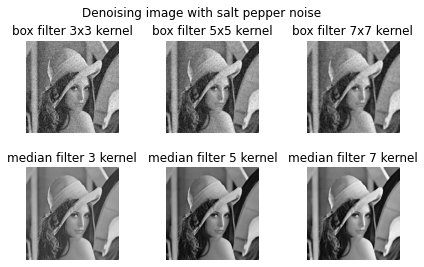

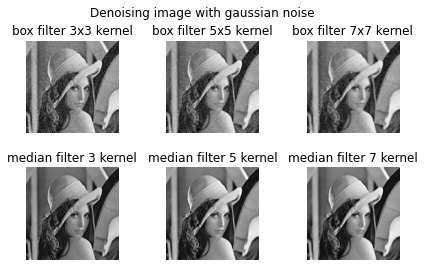

In [20]:
color_saltpepper = cv2.imread("./sample_data/image1_saltpepper.jpg").astype(np.float32)
saltpepper = cv2.cvtColor(color_saltpepper, cv2.COLOR_BGR2GRAY)

color_gaussian = cv2.imread("./sample_data/image1_gaussian.jpg").astype(np.float32)
gaussian = cv2.cvtColor(color_gaussian, cv2.COLOR_BGR2GRAY)
images = {"salt pepper": saltpepper, "gaussian": gaussian}
kernel_sizes = [3, 5, 7]
for image in images:
    fig, axs = plt.subplots(2, 3)
    fig.suptitle(f"Denoising image with {image} noise")
    fig.tight_layout()
    image = images[image]
    for i, kernel_size in enumerate(kernel_sizes):
        denoised_box = denoise(image, 'box', kernel_size=(kernel_size, kernel_size))
        denoised_median = denoise(image, 'median', kernel_size=kernel_size)
        axs[0, i].imshow(denoised_box, cmap='gray')
        axs[0, i].set_title(f"box filter {kernel_size}x{kernel_size} kernel")
        axs[0, i].axis('off')
        axs[1, i].imshow(denoised_median, cmap='gray')
        axs[1, i].set_title(f"median filter {kernel_size} kernel")
        axs[1, i].axis('off')
    fig.show()

#### <span style="color:orange;"> Question 12 (3 pts) </span>
Using your implemented function **myPSNR**, compute the PSNR for every denoised image (12 in total) wrt the original image. What is the effect of the filter size on the PSNR? When you present results in the next cell make sure it's readible.

In [21]:
PSNRs = {"salt pepper": {"box": {}, "median": {}}, "gaussian": {"box": {}, "median": {}}}
color_saltpepper = cv2.imread("./sample_data/image1_saltpepper.jpg").astype(np.float32)
saltpepper = cv2.cvtColor(color_saltpepper, cv2.COLOR_BGR2GRAY)

color_gaussian = cv2.imread("./sample_data/image1_gaussian.jpg").astype(np.float32)
gaussian = cv2.cvtColor(color_gaussian, cv2.COLOR_BGR2GRAY)

orig_image = cv2.imread("./sample_data/image1.jpg").astype(np.float32)
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)

images = {"salt pepper": saltpepper, "gaussian": gaussian}
kernel_sizes = [3, 5, 7]
for image_name in images:
    image = images[image_name]
    for kernel_size in kernel_sizes:
        denoised_box = denoise(image, 'box', kernel_size=(kernel_size, kernel_size))
        PSNR_box = myPSNR(orig_image, denoised_box)
        PSNRs[image_name]["box"][kernel_size] = PSNR_box
        denoised_median = denoise(image, 'median', kernel_size=kernel_size)
        PSNR_median = myPSNR(orig_image, denoised_median)
        PSNRs[image_name]["median"][kernel_size] = PSNR_median
        
        
print(f"                               Salt pepper noise PSNR")
print(f"                    3x3                   5x5                    7x7")
print(f"Box filter          {PSNRs['salt pepper']['box'][3]}     {PSNRs['salt pepper']['box'][5]}     {PSNRs['salt pepper']['box'][7]}")
print(f"Median filter       {PSNRs['salt pepper']['median'][3]}     {PSNRs['salt pepper']['median'][5]}     {PSNRs['salt pepper']['median'][7]}")
print("")
print(f"                               Gaussian noise PSNR")
print(f"                    3x3                   5x5                    7x7")
print(f"Box filter          {PSNRs['gaussian']['box'][3]}    {PSNRs['gaussian']['box'][5]}     {PSNRs['gaussian']['box'][7]}")
print(f"Median filter       {PSNRs['gaussian']['median'][3]}     {PSNRs['gaussian']['median'][5]}      {PSNRs['gaussian']['median'][7]}")

                               Salt pepper noise PSNR
                    3x3                   5x5                    7x7
Box filter          24.238679183706445     26.16410150201314     26.039979404657252
Median filter       34.73352289168657     31.78543107631624     29.785487523618098

                               Gaussian noise PSNR
                    3x3                   5x5                    7x7
Box filter          24.32202311765451    25.176395744873425     24.827732488695787
Median filter       34.55891612139924     31.85700070889816      29.80537389653692


For the median filter, the PSNR gets lower when the kernel size gets higher. For the box filter, the PSNR is small with a very small and with a very large kernel, so somewhere in between is the best. 

#### <span style="color:orange;"> Question 13 (2 pts) </span>
Which is better for the salt-and-pepper noise, box or median filters? Why? What about the Gaussian noise?


The 3x3 median filter returns the higher PSNR, so this filter is better for the salt-and-pepper noise. The filter is in general better since for all kernel sizes, the median filter produces a higher PSNR than the box filter. The same is the case for the gaussian noise.

#### <span style="color:orange;"> Question 14 (2 pts) </span>
Try denoising image1_gaussian.jpg using a Gaussian filtering. Choose an appropriate window size ([3x3, 5x5, 7x7]) and standard deviation ([0.2, 0.5, 1, 3, 5, 7])and justify your choice. Show the denoised images in the cell below.


/Users/machameijer/anaconda3/envs/cv1/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


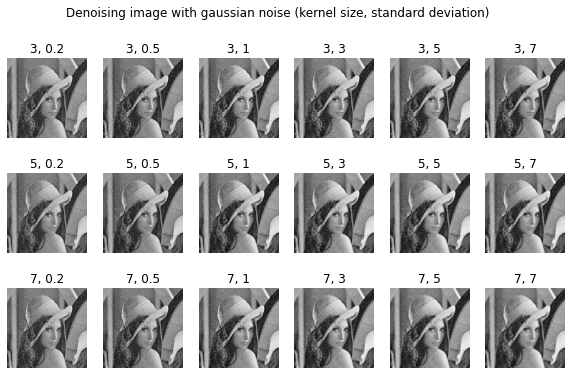

In [22]:
color_gaussian = cv2.imread("./sample_data/image1_gaussian.jpg").astype(np.float32)
gaussian = cv2.cvtColor(color_gaussian, cv2.COLOR_BGR2GRAY)
kernel_sizes = [3, 5, 7]
stds = [0.2, 0.5, 1, 3, 5, 7]

fig, axs = plt.subplots(3, 6)
fig.set_size_inches(10, 6)
fig.suptitle(f"Denoising image with gaussian noise (kernel size, standard deviation)")
# fig.tight_layout()
for i, kernel_size in enumerate(kernel_sizes):
    for j, std in enumerate(stds):
        denoised_gaussian = denoise(gaussian, 'gaussian', kernel_size=(kernel_size, kernel_size), sigma=std)
        axs[i, j].imshow(denoised_gaussian, cmap='gray')
        axs[i, j].set_title(f"{kernel_size}, {std}")
        axs[i, j].axis('off')
fig.show()

Above, the results of all kernel sizes and standard deviation combinations are showed. In general, if a higher kernel size is set, the standard deviation should be lower, because otherwise the image is blurred too much, as can be seen in for example the 7,7 image (bottom right). If a lower kernel size is chosen, the standard deviation should be higher, since otherwise the noise is not fully removed. This can be seen in the upper row of the images, in the 3, 0.2 image a lot more noise is visible than in the 3.7 image.

#### <span style="color:orange;"> Question 15 (2 pts) </span>
What is the effect of the standard deviation on the PSNR?


In [23]:
color_gaussian = cv2.imread("./sample_data/image1_gaussian.jpg").astype(np.float32)
gaussian = cv2.cvtColor(color_gaussian, cv2.COLOR_BGR2GRAY)

orig_image = cv2.imread("./sample_data/image1.jpg").astype(np.float32)
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)

kernel_sizes = [3, 5, 7]
stds = [0.2, 0.5, 1, 3, 5, 7]

PSNRs = {3: {}, 5: {}, 7: {}}

for i, kernel_size in enumerate(kernel_sizes):
    for j, std in enumerate(stds):
        denoised_gaussian = denoise(gaussian, 'gaussian', kernel_size=(kernel_size, kernel_size), sigma=std)
        PSNR = myPSNR(orig_image, denoised_gaussian)
        PSNRs[kernel_size][std] = PSNR
        

print(f"                               Gaussian filter noise PSNR")
print(f"                    3x3                   5x5                    7x7")
print(f"0.2          {PSNRs[3][0.2]}    {PSNRs[5][0.2]}     {PSNRs[7][0.2]}")
print(f"0.5          {PSNRs[3][0.5]}    {PSNRs[5][0.5]}     {PSNRs[7][0.5]}")
print(f"1            {PSNRs[3][1]}     {PSNRs[5][1]}     {PSNRs[7][1]}")
print(f"3            {PSNRs[3][3]}    {PSNRs[5][3]}     {PSNRs[7][3]}")
print(f"5            {PSNRs[3][5]}    {PSNRs[5][5]}      {PSNRs[7][5]}")
print(f"7            {PSNRs[3][7]}    {PSNRs[5][7]}     {PSNRs[7][7]}")

                               Gaussian filter noise PSNR
                    3x3                   5x5                    7x7
0.2          17.170952256272322    17.170952256272322     17.170952256272322
0.5          20.57804889045174    20.585455345613145     20.585455812089428
1            24.13738106242046     24.89524698456723     24.940536715888047
3            24.331412348521056    25.276838418002736     25.107663662211536
5            24.326147794468582    25.21674874793642      24.937267170496618
7            24.324225914891066    25.197563883700944     24.88477895286667


If the standard deviation gets higher, the PSNR gets higher. However, if a large kernel is used, if the standard deviation gets too high, the PSNR decreases. This is probably due to the fact that a large kernel blurs the image more, and a large standard deviation also causes more blurring, so if a large kernel and a large std are combined, the image gets blurred too much.

#### <span style="color:orange;"> Question 16 (2 pts) </span>
What is the difference among median filtering, box filtering and Gaussian filtering? Briefly explain how they are different at a conceptual level. If two filtering methods give a PSNR in the same ballpark, can you see a qualitative difference?

A box filter takes the average of all surrounding pixels (including the pixel on which the filter is applied), and substitutes the pixel value with the average. The median filter takes the median of all surrounding pixels, instead of the average. Lastly, the gaussian filter computes the new pixel value by applying a gaussian function. This means that the new pixel value is most dependent on the original value of the pixel itself, and if the pixels are further from this center pixel, they contribute less to the new result. How much they contribute depends on the standard deviation.

In general, the result of the gaussian will appear smoother and closer than the median, and the median will look better than the box filter. This is because the gaussian filter depends most on the original pixel value, and the box filter depends least on the original pixel value.

## 4.3 Edge detection *(20 pts)*

Edges appear when there is a sharp change in brightness. In an image this usually corresponds to the boundaries of an object. Edge detection is a fundamental task used in many computer vision applications. One of them is road detection in autonomous driving, which is used for determining the vehicle trajectory.

Many different techniques exist for computing the edges. In this section, we will focus on filters that extract the gradient of the image. We will try to detect the road in an still image.

### 4.3.1 First-order derivative filters *(10 pts)*


**Sobel** kernels approximate the first derivative of a Gaussian filter. Below are the Sobel kernels used in the $x$ and $y$ directions.

\begin{equation}
\begin{array}{rl}
G_x = \begin{bmatrix} +1 & 0 & -1 \\ +2 & 0 & -2 \\ +1 & 0 & -1 \end{bmatrix} * \mathbf{I}
\end{array}
\end{equation}

\begin{equation}
\begin{array}{rl}
G_y = \begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} * \mathbf{I}
\end{array}
\end{equation}
The gradient magnitude is defined as the square root of the sum of the squares of the horizontal ($G_x$) and the vertical ($G_y$) components of the gradient of an image, such that:
\begin{equation}
G =\sqrt {{G_x}^2+{G_y}^2}
\end{equation}
The gradient direction is calculated as follows:
\begin{equation}
\theta= \tan ^{ - 1}{\frac{G_y}{G_x}}
\end{equation}


#### <span style="color:#F64E25;"> Exercise 7 </span>

Implement `compute_gradient`

**Note:**
You are not allowed to use the Python built-in functions for computing gradient. But for doing 2D convolution, you can benefit from `scipy.signal.convolve2d` function.

In [24]:
def compute_gradient(image):
    '''
    The outputs of this function should be:
      1. The gradient of the image in the x-direction.
      2. The gradient of the image in the y-direction.
      3. The gradient magnitude.
      4. The gradient direction.
    '''

    x_gradient_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    y_gradient_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    Gx = scipy.signal.convolve2d(image,x_gradient_kernel)
    Gy = scipy.signal.convolve2d(image,y_gradient_kernel)
    im_magnitude = np.sqrt(Gx**2 + Gy**2)
    im_direction = np.arctan2(Gy,Gx)
    
    return Gx, Gy, im_magnitude, im_direction

#### <span style="color:orange;">  Question 17 (10 pts) </span>
Using your implemented function `compute_gradient` on image2.jpg, display the following figures:

  1. The gradient of the image in the x-direction.

  2. The gradient of the image in the y-direction.

  3. The gradient magnitude of each pixel.

  4. The gradient direction of each pixel.

Discuss what kind of information every image conveys.



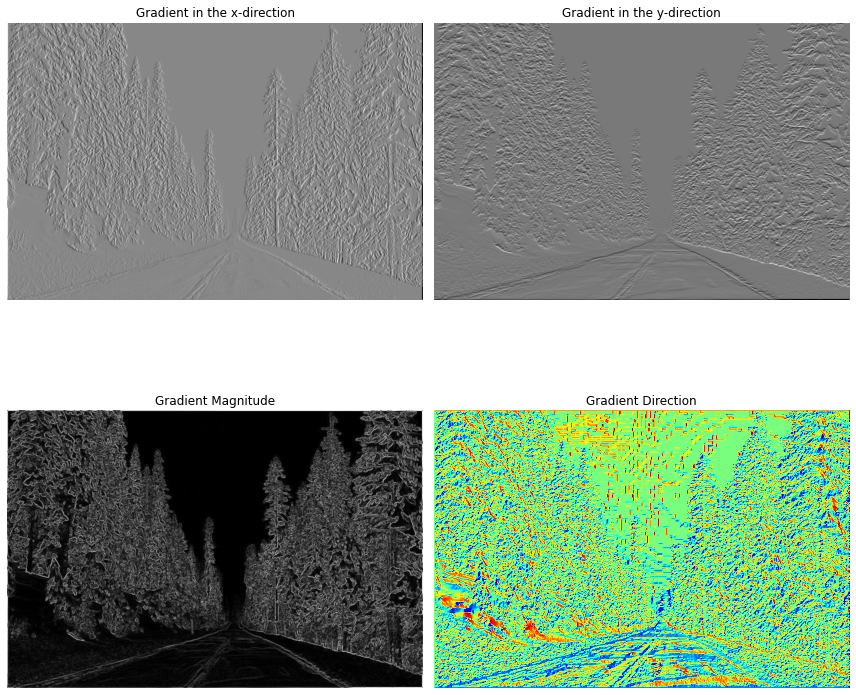

In [25]:

image = cv2.imread("./sample_data/image2.jpg")
image  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Gx, Gy, im_magnitude, im_direction = compute_gradient(image)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))


axs[0, 0].imshow(Gx, cmap='gray')
axs[0, 0].set_title('Gradient in the x-direction')
axs[0, 0].axis('off')


axs[0, 1].imshow(Gy, cmap='gray')
axs[0, 1].set_title('Gradient in the y-direction')
axs[0, 1].axis('off')


axs[1, 0].imshow(im_magnitude, cmap='gray')
axs[1, 0].set_title('Gradient Magnitude')
axs[1, 0].axis('off')


axs[1, 1].imshow(im_direction, cmap='jet')  
axs[1, 1].set_title('Gradient Direction')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()



**Gradient in the x-direction**: This image emphasizes the vertical edges in the original image. It responds to changes in intensity in the horizontal direction. 

**Gradient in the y-direction**:  This image highlights the horizontal edges in the original image. It responds to changes in intensity in the vertical direction. 

Both Gx and Gy help in edge detection

**Gradient Magnitude**: In this image we can find a measure of the overall rate of change of the image intensity. It gives the stength of the edges identified. 

**Gradient Direction**: It highlights the orientation of the edges

In essence, the gradient images (both x and y) help in edge detection, the magnitude gives the strength of these edges, and the direction provides the orientation of the edges.

### 4.3.2 Second-order derivative filters *(10 pts)*

Compared to the Sobel filter, a Laplacian of Gaussian (LoG) relies on the second derivative of a Gaussian filter. Hence, it will focus on large gradients in the image. A LoG can be computed by the following three methods:



*   method 1: Smoothing the image with a Gaussian kernel (kernel size of 5 and standard deviation of 0.5), then taking the Laplacian of the smoothed image (i.e. second derivative).
*   method 2: Convolving the image directly with a LoG kernel (kernel size of 5 and standard deviation of 0.5).

*   method 3: Taking the Difference of two Gaussians (DoG) computed at different scales $\sigma_1$ and $\sigma_2$.





#### <span style="color:#F64E25;"> Exercise 8 </span>

Implement `compute_LoG`

The function should be able to apply any of the above mentioned methods depending on the value passed to the parameter *LOG_type*

**Note:**
You are not allowed to use the Python built-in functions for computing LOG kernels. But for doing 2D convolution, you can benefit from *scipy.signal.convolve2d* function.

In [26]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * 
                     np.exp(- ((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def laplacian_of_gaussian(size, sigma):
    
    #kernel = np.fromfunction(
      #lambda x, y: (1/ (np.pi * sigma**4)) * 
        #            (1 - ((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)) * 
       #     np.exp(- ((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
      #[size, size])
    
    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = (-1/ (np.pi * sigma**4)) *  (1 - (((x**2+y**2) / (2 * sigma**2)))) * np.exp(1 - ((x**2+y**2) / (2 * sigma**2)))

    #kernel = kernel = kernel / np.sum(np.abs(kernel))
    #kernel = [[0,1,0],[1,-4,1],[0,1,0]]
    #kernel = [[0,0,1,0,0],[0,1,2,1,0],[1,2,-16,2,1],[0,1,2,1,0],[0,0,1,0,0]]
    #print(kernel.sum())
    kernel = -kernel / np.sum(kernel)
    kernel = np.round(kernel)
    return kernel  

In [27]:
log_kernel = laplacian_of_gaussian(5, 0.5)
print(log_kernel.sum())
print(log_kernel)

0.0
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1. -4.  1.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [28]:
def compute_LoG(image, LOG_type):
    if LOG_type == 1:
        # Method 1
        gaussian = gaussian_kernel(5, 0.5)
        smoothed = scipy.signal.convolve2d(image, gaussian)
        
        laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        imOut = scipy.signal.convolve2d(smoothed, laplacian)

    elif LOG_type == 2:
        
        log_kernel = laplacian_of_gaussian(5, 0.5)
        imOut = scipy.signal.convolve2d(image, log_kernel)
        

    elif LOG_type == 3:
        # Method 3
        # Difference of two Gaussians (DoG) computed at different scales
        sigma1, sigma2 = 0.5, 1
        gaussian1 = gaussian_kernel(5, sigma1)
        gaussian2 = gaussian_kernel(5, sigma2)
        dog = gaussian1 - gaussian2
        imOut = scipy.signal.convolve2d(image, dog)

    else:
        raise ValueError("Invalid LOG_type. Choose from {1, 2, 3}.")

    return imOut

#### <span style="color:orange;">  Questions 18 (10 pts) </span>

1.   Test your function using image2.jpg and visualize your results using the three methods (1 pts).





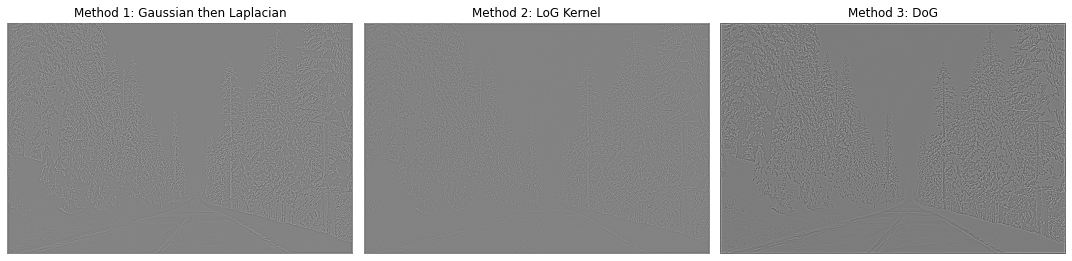

In [29]:
import cv2
import matplotlib.pyplot as plt
import scipy as sp

# Load the image using cv2 in grayscale mode
image = cv2.imread('./sample_data/image2.jpg', cv2.IMREAD_GRAYSCALE)

# Apply compute_LoG for each method
log1 = compute_LoG(image, LOG_type=1)
log2 = compute_LoG(image, LOG_type=2)
log3 = compute_LoG(image, LOG_type=3)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Method 1
axs[0].imshow(log1, cmap='gray')
axs[0].set_title('Method 1: Gaussian then Laplacian')
axs[0].axis('off')

# Method 2
axs[1].imshow(log2, cmap='gray')
axs[1].set_title('Method 2: LoG Kernel')
axs[1].axis('off')

# Method 3
axs[2].imshow(log3, cmap='gray')
axs[2].set_title('Method 3: DoG')
axs[2].axis('off')



plt.tight_layout()
plt.show()


We can see that we obtain the same three results applying the 3 different methods.


2.   Discuss the difference between applying the three methods (3 pts).


In the first method we apply two separates steps: first a Gaussian filter, than a Laplacian one. This can leave us more control over the smoothing process, but is computationally more expensive.

In the second method we apply directly a LoG kernel. This is computationally cheaper, but leaving us in fact with less control over the smoothing process.

The third method is computationally the more efficient one between all the three of them. However, it is an approximation of LoG, and so the results may be less accurate and precise


3.   In the first method, why is it important to convolve an image with a Gaussian before convolving with a Laplacian? (2 pts)




Convolving an image with a gaussian filter allows us to reduce noise and already smooth the image. The Laplacian is very sensitive to noise, and without prior smoothing, the noise would be detected as an edge possibly, leading to an inaccurate representation of the edges.

4.   In the third method, what is the best ratio between $\sigma_1$ and $\sigma_2$ to achieve the best approximation of the LoG? What is the purpose of having 2 standard deviations? (2 pts)



It can be proved that the best ratio between $\sigma_1 $ and $\sigma_2$ to achieve the best approximation of Log is when $\frac{\sigma_1}{\sigma_2} = 1+ \epsilon$, for a given small epsilon. This means that the difference should be as small as possible. 
Two different standards deviations helps to highlights edges that occur at different scales, plus preserving spatial information

5.   What else is needed to improve the performance and isolate the road,  i.e. what else should be done? You don't have to provide any specific parameter or specific algorithm. Try to propose a direction which would be interesting to explore and how you would approach it. (2 pt)


This could be done following different approaches. One of them is by using a more ML-based approach, such as Image Segmentation. We have seen the success of this approach in the last advancement in ML (SAM is a clear example).

## 4.4 Foreground-background separation *(25 pts)*

Foreground-background separation is an important task in the field of computer vision (see Figure). In this exercise, you will implement a simple unsupervised algorithm that leverages the variations in texture to segment the foreground object from the background. We will assume the foreground object has a distinct combination of textures compared to background. As mentioned earlier, Gabor filters are well-suited for texture analysis thanks to their frequency domain characteristics. Therefore, we will use a collection of Gabor filters with varying scale and orientations which we call a *filter bank*. The outline of the algorithm is as follows:

![](https://drive.google.com/uc?export=view&id=1w60xJ4UlG60Ie6ljRkHn0GJDdVu9eb5e)

**(Left)** Input image, **(Middle)** Foreground mask, **(Right)** Masked object. Foreground-Background separation aims at masking out the salient object pixels from the background pixels.

---

**Algorithm 1** Foreground-Background Segmentation Algorithm

---

**Input:** $x$ - input image

**Output:** $y$ - pixelwise labels



1.   Convert to grayscale if necessary.

>**if** $x$ is RGB **then**

>>$x$ $\leftarrow$ rgb2gray($x$)

>**end if**

2.   Create Gabor filterbank, $\mathcal{F}_{gabor}$, with varying $\sigma$, $\lambda$ and $\theta$.

3.   Filter $x$ with the filterbank. Store each output in $fmaps$.

4.   Compute the magnitude of the complex $fmaps$. Store the results in $fmags$.

>$fmags$ $\leftarrow$  $\vert fmaps \vert$

5.   Smooth $fmags$.

>$fmags$ $\leftarrow$  smooth($fmags$)

6.   Convert $fmags$ into data matrix, $f$.

>$f$ $\leftarrow$  reshape($fmags$)

7.   Cluster $f$ using kmeans into two sets.

>$y$ $\leftarrow$  kmeans($f$, 2)

---


### <span style="color:orange;"> Questions 19 (25 pts) </span>

1.   Run the algorithm on all test images with the provided parameter settings. What do you observe? Explain shortly. (15 pts)


*Write your answer here*


2.   Experiment with different $\lambda$, $\sigma$ and $\theta$ settings until you get reasonable outputs. Report what parameter settings work better for each input image and try to explain why. (4 pts)

**Hint:**
Don't change multiple variables at once. You might not need to change some at all.



*Write your answer here*

3.   After you achieve good separation on all test images, run the script again with corresponding parameters but this time with
`smoothingFlag = False`. (6 pts)

Describe what you observe at the output when smoothing is not applied on the magnitude images. Explain why it happens and try to reason about the motivation behind this step.

*Write your answer here*

### <span style="color:#F64E25;"> Exercise 9</span>

Please get yourself familiar with provided skeleton code below. Keep in mind that you will need your implementation of the **createGabor** function.

When you succesfully implement it all, it should run without problems and produce a reasonable segmentation with the default parameters on **kobi.png**.

#### Utility functions

In [30]:
### Helper functions for the last exercise

def load_image(image_id: str='Polar'):
    '''
    Loads an image, resizes image with proper resize factor and sets proper color representation
    :param image_id: id of an image: Kobi, Polar, Robin-1, Robin-2, Cows, SciencePark
    :return: image
    '''
    
    if image_id == 'Kobi':
        img = cv2.imread('./sample_data/kobi.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.25
    elif image_id == 'Polar':
        img = cv2.imread('./sample_data/polar-bear-hiding.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.75
    elif image_id == 'Robin-1':
        img = cv2.imread('./sample_data/robin-1.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 1
    elif image_id == 'Robin-2':
        img = cv2.imread('./sample_data/robin-2.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.5
    elif image_id == 'Cows':
        img = cv2.imread('./sample_data/cows.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.5
    elif image_id == 'SciencePark':
        img = cv2.imread('./sample_data/sciencepark.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.2
    else:
        raise ValueError('Image not available.')
        img = cv2.resize(img, (0, 0), fx=resize_factor, fy=resize_factor)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img


def show_image(image, image_id:str= "Polar", cmap='gray'):
    '''
    Displays image in grey scale
    :param image: image that should be displayed
    :param image_id: id of an image: Kobi, Polar, Robin-1, Robin-2, Cows, SciencePark
    :param cmap: matplotlib cmap arg
    '''
    plt.figure()
    plt.title(image_id)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")

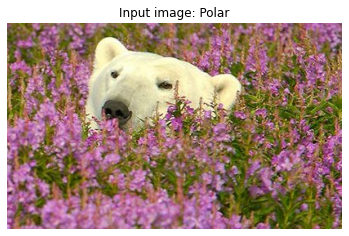

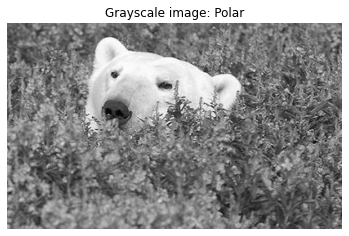

In [31]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_id = "Polar"
imga = load_image(image_id)  # load an image with the specified ID
show_image(imga, f'Input image: {image_id}')

# Convert to grayscale if necessary
if len(imga.shape) == 3:  # Check if the image has 3 channels (RGB)
    img = cv2.cvtColor(imga, cv2.COLOR_RGB2GRAY)
else:
    img = imga

# Display the grayscale image
show_image(img, f'Grayscale image: {image_id}')

In [32]:
def filterBank(img):

    numRows, numCols = img.shape

    # Estimate the minimum and maximum of the wavelengths for the sinusoidal carriers.
    lambdaMin = 4/np.sqrt(2)
    lambdaMax = np.sqrt(numRows**2 + numCols**2)

    # Specify the carrier wavelengths.
    n = np.floor(np.log2(lambdaMax/lambdaMin))
    lambdas = 2**np.arange(0, (n-2)+1) * lambdaMin

    # Define the set of orientations for the Gaussian envelope.
    dTheta = 2 * np.pi/8
    orientations = np.arange(0, np.pi+dTheta, dTheta)

    # Define the set of sigmas for the Gaussian envelope.
    sigmas = np.array([1,2])

    # Create the filter bank.
    gaborFilterBank = []
    tic = time.time()
    for lmbda in lambdas:
        for sigma in sigmas:
            for theta in orientations:
                # Filter parameter configuration for this filter.
                psi    = 0
                gamma  = 0.5

                # Create a Gabor filter with the specs above using the function createGabor()
                gaborFilter = createGabor(sigma, theta, lmbda, psi, gamma)

                # Store the filter and its parameters in the filter bank
                filter_config = {}
                filter_config["filterPairs"]  = gaborFilter
                filter_config["sigma"]       = sigma
                filter_config["lmbda"]       = lmbda
                filter_config["theta"]       = theta
                filter_config["psi"]         = psi
                filter_config["gamma"]       = gamma
                gaborFilterBank.append(filter_config)

    ctime = time.time() - tic

    print('--------------------------------------\n \t\tDetails\n--------------------------------------')
    print(f'Total number of filters       : {len(gaborFilterBank)}')
    print(f'Number of scales (sigma)      : {len(sigmas)}')
    print(f'Number of orientations (theta): {len(orientations)}')
    print(f'Number of carriers (lambda)   : {len(lambdas)}')
    print(f'---------------------------------------')
    print(f'Filter bank created in {ctime} seconds.')
    print(f'---------------------------------------')
    return gaborFilterBank

# Test the function
gaborFilterBank = filterBank(img)


--------------------------------------
 		Details
--------------------------------------
Total number of filters       : 60
Number of scales (sigma)      : 2
Number of orientations (theta): 5
Number of carriers (lambda)   : 6
---------------------------------------
Filter bank created in 0.005480289459228516 seconds.
---------------------------------------


In [33]:
### Foreground-Background segmentation algoritm
### Part 2 - gabor features fMaps and fMags

def gaborFeatures(img, gaborFilterBank, visFlag=False):

  '''
  Filter images using Gabor filter bank using quadrature pairs (real and imaginary parts)
  You will now filter the input image with each complex Gabor filter in
  gaborFilterBank structure and store the output in the cell called featureMaps.
  Hint-1: Apply both the real imaginary parts of each kernel
          separately in the spatial domain (i.e. over the image).
  Hint-2: Assign each output (i.e. real and imaginary parts) in
          variables called real_out and imag_out.
  Hint-3: Use built-in cv2 function, filter2D, to convolve the filter
          with the input image. Check the options for padding. Find
          the one that works well. You might want to
          explain what works better and why shortly in the report.
  '''

  featureMaps = []

  for gaborFilter in gaborFilterBank:
    # gaborFilter["filterPairs"] has two elements. One is related to the real part
    # of the Gabor Filter and the other one is the imagineray part.

    real_filter = gaborFilter["filterPairs"][0]
    imag_filter = gaborFilter["filterPairs"][1]

        # Convolve the grayscale input with real and imaginary parts of the Gabor filter
    real_out = cv2.filter2D(img, cv2.CV_64F, real_filter, borderType=cv2.BORDER_CONSTANT)
    imag_out = cv2.filter2D(img, cv2.CV_64F, imag_filter, borderType=cv2.BORDER_CONSTANT)

    featureMaps.append(np.stack((real_out, imag_out), 2))
    # Visualize the filter responses if you wish.
    if visFlag:
        fig = plt.figure()

        ax = fig.add_subplot(1, 2, 1)
        ax.imshow(real_out)    # Real
        title = "Re[h(x,y)], \n lambda = {0:.4f}, \n theta = {1:.4f}, \n sigma = {2:.4f}".format(gaborFilter["lmbda"],
                                                                                                 gaborFilter["theta"],
                                                                                                 gaborFilter["sigma"])
        ax.set_title(title)
        ax.axis("off")

        ax = fig.add_subplot(1, 2, 2)
        ax.imshow(imag_out)    # Real
        title = "Im[h(x,y)], \n lambda = {0:.4f}, \n theta = {1:.4f}, \n sigma = {2:.4f}".format(gaborFilter["lmbda"],
                                                                                                 gaborFilter["theta"],
                                                                                                 gaborFilter["sigma"])
        ax.set_title(title)
        ax.axis("off")
        plt.show()

  # Compute the magnitude
  # Now, you will compute the magnitude of the output responses.
  # \\ Hint: (real_part^2 + imaginary_part^2)^(1/2) \\
  featureMags = []
  for i, fm in enumerate(featureMaps):
    real_part = fm[...,0]
    imag_part = fm[...,1]
    mag = np.sqrt(real_part**2 + imag_part**2)  # Compute the magnitude
    featureMags.append(mag)

    # Visualize the magnitude response if you wish.
    if visFlag:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.imshow(mag.astype(np.uint8))    # visualize magnitude
        title = "Re[h(x,y)], \n lambda = {0:.4f}, \n theta = {1:.4f}, \n sigma = {2:.4f}".format(gaborFilterBank[i]["lmbda"],
                                                                                                 gaborFilterBank[i]["theta"],
                                                                                                 gaborFilterBank[i]["sigma"])
        ax.set_title(title)
        ax.axis("off")

  print('Created', len(featureMags), 'features for each pixel')
  return featureMags

# test
featureMags = gaborFeatures(img, gaborFilterBank)

Created 60 features for each pixel


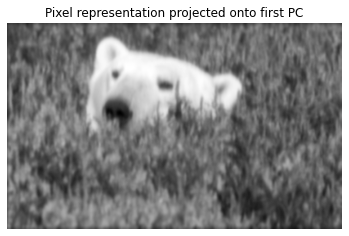

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def clusterFeatures(img, featureMags, smoothingFlag=True):
    numRows, numCols = img.shape
    features = np.zeros(shape=(numRows, numCols, len(featureMags)))

    if smoothingFlag:
        # Define a Gaussian kernel for smoothing
        kernel_size = 5
        sigma = 1.0
        gauss_kernel = cv2.getGaussianKernel(kernel_size, sigma)
        gauss_kernel = gauss_kernel @ gauss_kernel.T  # Convert to 2D kernel

        for i, fmag in enumerate(featureMags):
            smoothed_fmag = cv2.filter2D(fmag, -1, gauss_kernel)
            features[:, :, i] = smoothed_fmag
    else:
        for i, fmag in enumerate(featureMags):
            features[:, :, i] = fmag

    # Reshape features
    features = np.reshape(features, newshape=(numRows * numCols, -1))

    # Standardize features
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(features)

    # Visualize the saliency map using the first principal component
    transformed_feature = PCA(n_components=1).fit_transform(standardized_features)
    feature2DImage = np.reshape(transformed_feature, newshape=(numRows, numCols))
    plt.figure()
    plt.title('Pixel representation projected onto first PC')
    plt.imshow(feature2DImage, cmap='gray')
    plt.axis("off")
    plt.show()

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=2, random_state=0).fit(standardized_features)
    pixLabels = kmeans.labels_

    return pixLabels

# Assuming img and featureMags are defined
pixLabels = clusterFeatures(img, featureMags)



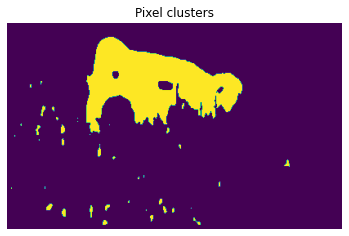

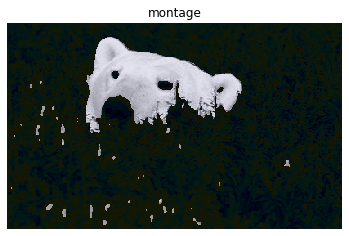

In [35]:
### Foreground-Background segmentation algoritm
### Part 4 - Visualise result

# Visualize the clustering by reshaping pixLabels into original grayscale
# input size [numRows numCols].
numRows, numCols = img.shape
pixLabels = np.reshape(pixLabels, newshape=(numRows, numCols))
plt.figure()
plt.title(f'Pixel clusters')
plt.imshow(pixLabels)
plt.axis("off")
plt.show()

# Use the pixLabels to visualize segmentation.
Aseg1 = np.zeros_like(img)
Aseg2 = np.zeros_like(img)
BW = pixLabels == 1  # check for the value of your labels in pixLabels (could be 1 or 0 instead of 2)
# BW = np.repeat(BW[:, :, np.newaxis], 3, axis=2) # do this only if you have 3 channels in the img
Aseg1[BW] = img[BW]
Aseg2[~BW] = img[~BW]

plt.figure()
plt.title(f'montage')
plt.imshow(Aseg1, 'gray', interpolation='none')
plt.imshow(Aseg2, 'jet',  interpolation='none', alpha=0.1)
plt.axis("off")
plt.show()

In [36]:


def run_and_visualize_segmentation(image_paths):
    for image_path in image_paths:
        # Step 1: Load the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Assuming grayscale

        # Step 2: Generate Gabor filter bank
        gabor_filter_bank = filterBank(img)

        # Step 3: Extract Gabor features
        feature_mags = gaborFeatures(img, gabor_filter_bank)

        # Step 4: Cluster features to get pixLabels
        pixLabels = clusterFeatures(img, feature_mags)

        # Step 5: Visualize the results
        numRows, numCols = img.shape
        pixLabels = np.reshape(pixLabels, newshape=(numRows, numCols))

        plt.figure()
        plt.title(f'Pixel clusters for {image_path}')
        plt.imshow(pixLabels, cmap='jet')
        plt.axis("off")
        plt.show()

        Aseg1 = np.zeros_like(img)
        Aseg2 = np.zeros_like(img)
        BW = pixLabels == 1  # check for the value of your labels in pixLabels (could be 1 or 0 instead of 2)
        # BW = np.repeat(BW[:, :, np.newaxis], 3, axis=2) # do this only if you have 3 channels in the img
        Aseg1[BW] = img[BW]
        Aseg2[~BW] = img[~BW]

        plt.figure()
        plt.title(f'montage')
        plt.imshow(Aseg1, 'gray', interpolation='none')
        plt.imshow(Aseg2, 'jet',  interpolation='none', alpha=0.1)
        plt.axis("off")
        plt.show()

# Example usage:



--------------------------------------
 		Details
--------------------------------------
Total number of filters       : 80
Number of scales (sigma)      : 2
Number of orientations (theta): 5
Number of carriers (lambda)   : 8
---------------------------------------
Filter bank created in 0.0062291622161865234 seconds.
---------------------------------------
Created 80 features for each pixel


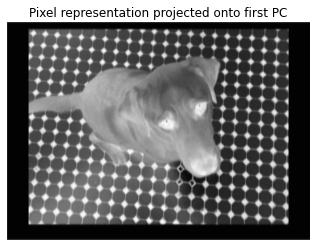

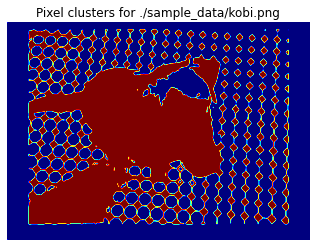

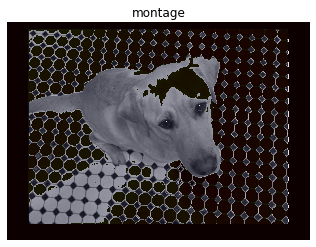

--------------------------------------
 		Details
--------------------------------------
Total number of filters       : 60
Number of scales (sigma)      : 2
Number of orientations (theta): 5
Number of carriers (lambda)   : 6
---------------------------------------
Filter bank created in 0.004616975784301758 seconds.
---------------------------------------
Created 60 features for each pixel


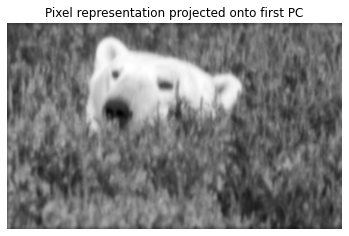

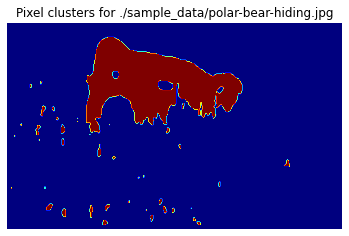

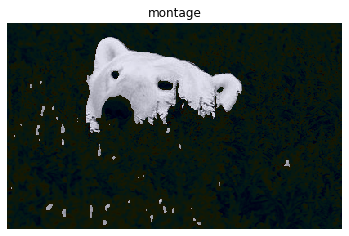

--------------------------------------
 		Details
--------------------------------------
Total number of filters       : 50
Number of scales (sigma)      : 2
Number of orientations (theta): 5
Number of carriers (lambda)   : 5
---------------------------------------
Filter bank created in 0.003899097442626953 seconds.
---------------------------------------
Created 50 features for each pixel


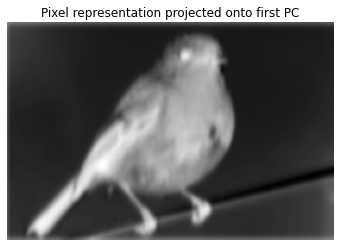

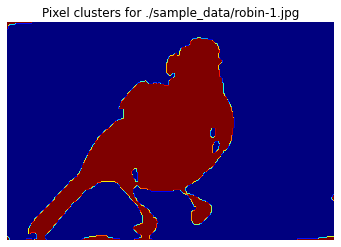

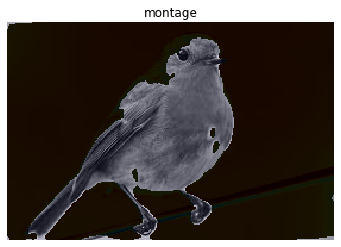

--------------------------------------
 		Details
--------------------------------------
Total number of filters       : 70
Number of scales (sigma)      : 2
Number of orientations (theta): 5
Number of carriers (lambda)   : 7
---------------------------------------
Filter bank created in 0.005501270294189453 seconds.
---------------------------------------
Created 70 features for each pixel


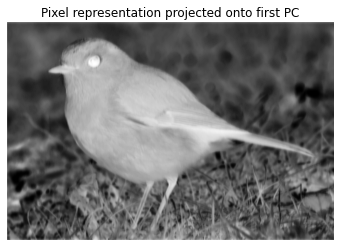

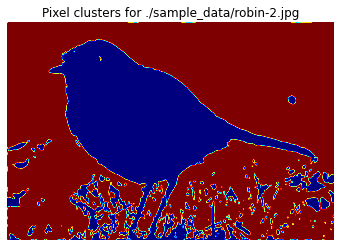

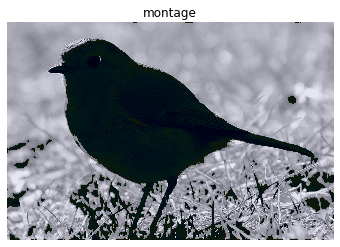

In [37]:
image_paths = ['./sample_data/kobi.png','./sample_data/polar-bear-hiding.jpg',
     './sample_data/robin-1.jpg','./sample_data/robin-2.jpg' ]
run_and_visualize_segmentation(image_paths)

In [38]:
#image_paths2 = ['./sample_data/cows.jpg','./sample_data/sciencepark.jpg', ]
#run_and_visualize_segmentation(image_paths2)

# X Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.


Name:

Contribution on research: \\
Contribution on programming: \\
Contribution on writing: \\

Name:

Contribution on research: \\
Contribution on programming: \\
Contribution on writing: \\

Name:

Contribution on research: \\
Contribution on programming: \\
Contribution on writing: \\

Name:

Contribution on research: \\
Contribution on programming: \\
Contribution on writing: \\

# -End of Notebook-